[0.77660882 0.62998313]
[0.77660882 0.62998313]


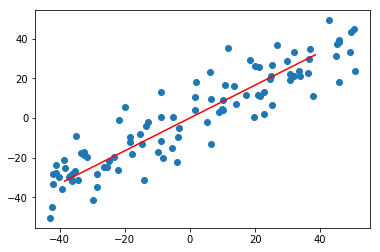

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x = np.empty((100,2))
np.random.seed(66)
x[:,0] = np.random.uniform(0.,100.,size=100)
x[:,1] = 0.75 * x[:,0] + 3. + np.random.normal(0, 10., size = 100)


def demean(x):
    return x - np.mean(x,axis=0)#在行上求每一列的均值，并做减法,向量化

x_demean = demean(x)
#np.mean(x_demean[:,0])
#np.mean(x_demean[:,1])

def f(w,x):
    return np.sum((x.dot(w))**2)/len(x)
def df_math(w,x):
    return x.T.dot(x.dot(w))*2./len(x)
def df_debug(w,x,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()#对某一个特征的偏导数
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,x) - f(w_2,x))/(2*epsilon)
    return res #模拟的导数值

def direction(w):#让一个向量膜为1，即为单位向量
    return w / np.linalg.norm(w)#向量除以其模

def gradient_ascent(df, x, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, x)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, x) - f(last_w, x)) < epsilon):
            break
        cur_iter += 1
    return w

initial_w = np.random.random((x.shape[1]))#初始值不能全为0，对于目标函数，w=0向量对应最小极值点，梯度也为0
eta = 0.001

#不能使用StandardScaler 不能进行标准化，因为不是线性变化

w1=gradient_ascent(df_debug,x_demean,initial_w,eta)
print(g1)
w2=gradient_ascent(df_math,x_demean,initial_w,eta)
print(g2)
plt.scatter(x_demean[:,0],x_demean[:,1])


plt.plot([-w2[0]*50,w2[0]*50],[-w2[1]*50,w2[1]*50],color='r')
plt.show()